## **USA TOP COMPANIES EDA & REVENUE PREDICTOR**

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [3]:
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html')

In [5]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector

In [6]:
table = soup.find_all('table')[1]

In [7]:
soup.find('table', class_='wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [8]:
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [9]:
world_titles = table.find_all('th')

In [10]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [11]:
world_table_titles = [title.text.strip() for title in world_titles]

In [12]:
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(columns=world_table_titles)

In [15]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [16]:
column_data = table.find_all('tr')

In [17]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)
    Length = len(df)
    df.loc[Length]=individual_row_data

['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas']
['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington']
['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas']
['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California']
['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota']
['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island']
['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska']
['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California']
['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas']
['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California']
['11', 'Cencora', 'Pharmacy wholesale', '238

In [18]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [19]:
df.to_csv(r'E:\Web Scraped Data\Large Companies in USA by Revenue')

In [20]:
df.set_index('Rank')

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
Rank,,,,,,
1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...
96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [22]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].astype(str).str.replace(',','').astype(int)
df['Employees'] = df['Employees'].astype(str).str.replace(r'\D','', regex=True).astype(float).astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    int32 
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    int32 
 6   Headquarters            100 non-null    object
dtypes: int32(2), object(5)
memory usage: 5.5+ KB


In [24]:
df['Revenue growth'] = df['Revenue growth'].astype(str).str.replace('%','').astype(float)

In [25]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(2), object(4)
memory usage: 5.5+ KB


In [27]:
df = df.rename(columns={'Revenue growth':'Revenue Growth in %'})

In [28]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth in %,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [29]:
df['City_Headquarters'] = df['Headquarters'].str.split(',').str[0]
df['State_Headquarters'] = df['Headquarters'].str.split(',').str[1]

In [30]:
df.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth in %,Employees,Headquarters,City_Headquarters,State_Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington",Seattle,Washington


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue Growth in %     100 non-null    float64
 5   Employees               100 non-null    int32  
 6   Headquarters            100 non-null    object 
 7   City_Headquarters       100 non-null    object 
 8   State_Headquarters      100 non-null    object 
dtypes: float64(1), int32(2), object(6)
memory usage: 7.0+ KB


In [32]:
df.drop('Headquarters', axis=1, inplace=True)

In [33]:
df.head(2)

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth in %,Employees,City_Headquarters,State_Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,Seattle,Washington


In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df['Industry'].value_counts()

Industry
Financials                            11
Retail                                10
Petroleum industry                    10
Healthcare                             6
Pharmaceutical industry                6
Insurance                              5
Technology                             5
Conglomerate                           3
Technology and cloud computing         3
Airline                                3
Telecommunications                     3
Financial                              2
Food processing                        2
Transportation                         2
Food industry                          2
Aerospace and defense                  2
Automotive industry                    2
Health insurance                       2
Apparel                                1
Infotech                               1
Telecom hardware manufacturing         1
Chemical industry                      1
Agriculture cooperative                1
Petroleum industry and logistics       1
Machine

In [36]:
import regex as re
def replace_financial(string):
    return re.sub(r'\bFinancial\b', 'Financials', string, flags=re.IGNORECASE)

df['Industry'] = df['Industry'].apply(replace_financial)

In [37]:
df['Industry'].value_counts()

Industry
Financials                            13
Retail                                10
Petroleum industry                    10
Healthcare                             6
Pharmaceutical industry                6
Insurance                              5
Technology                             5
Airline                                3
Telecommunications                     3
Technology and cloud computing         3
Conglomerate                           3
Health insurance                       2
Automotive industry                    2
Aerospace and defense                  2
Food industry                          2
Transportation                         2
Food processing                        2
Telecom hardware manufacturing         1
Agriculture cooperative                1
Agriculture manufacturing              1
Chemical industry                      1
Apparel                                1
Petroleum industry and logistics       1
Machinery                              1
Infotec

In [38]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)',
       'Revenue Growth in %', 'Employees', 'City_Headquarters',
       'State_Headquarters'],
      dtype='object')

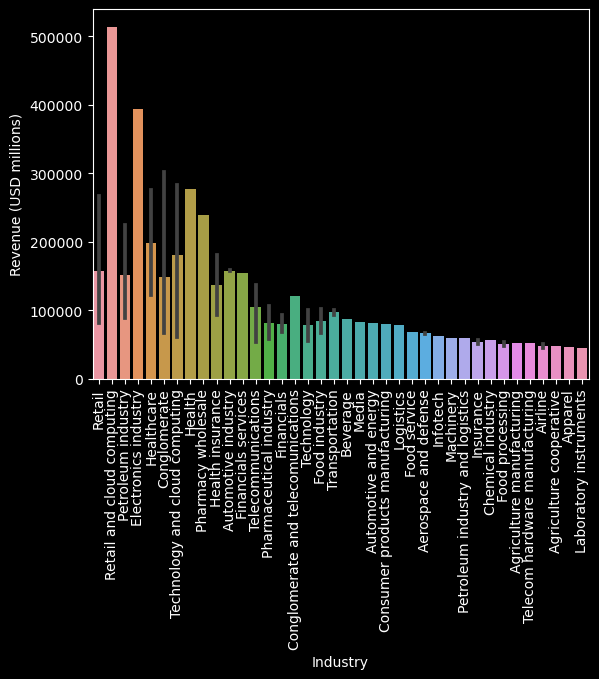

In [39]:
plt.style.use('dark_background');
sns.barplot(data=df.sort_values('Revenue (USD millions)', ascending=False), x='Industry', y='Revenue (USD millions)')
plt.xticks(rotation=90)
plt.show()

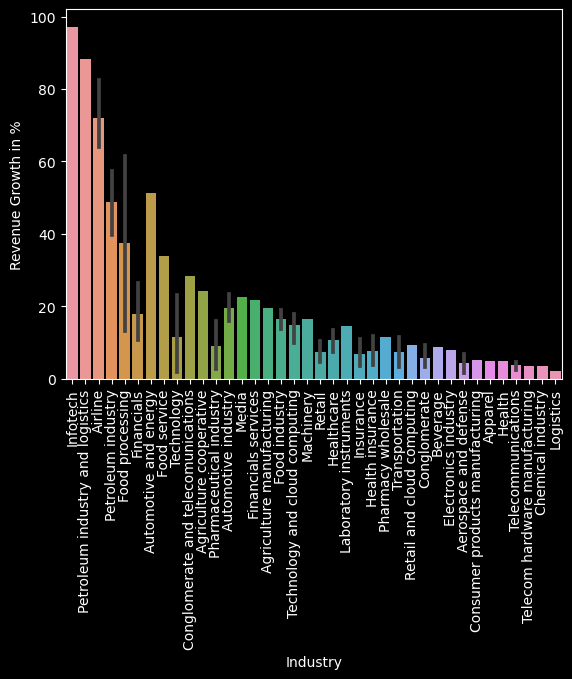

In [40]:
plt.style.use('dark_background');
sns.barplot(data=df.sort_values('Revenue Growth in %', ascending=False), x='Industry', y='Revenue Growth in %')
plt.xticks(rotation=90)
plt.show()

In [41]:
df.head(1)

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth in %,Employees,City_Headquarters,State_Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas


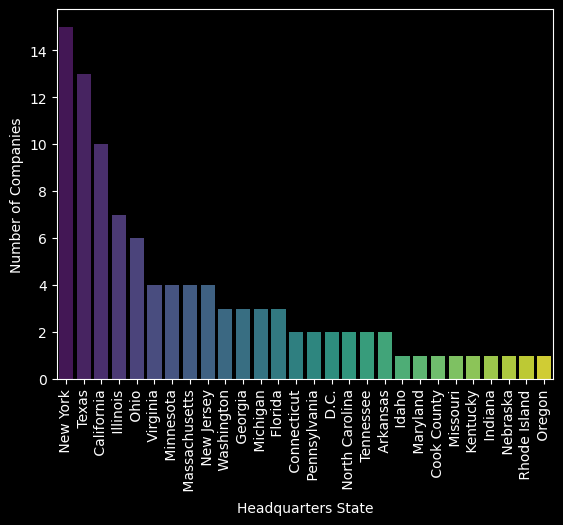

In [42]:
plt.style.use('dark_background');
sns.countplot(data=df, x='State_Headquarters', order= df['State_Headquarters'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Number of Companies')
plt.xlabel('Headquarters State')
plt.show()

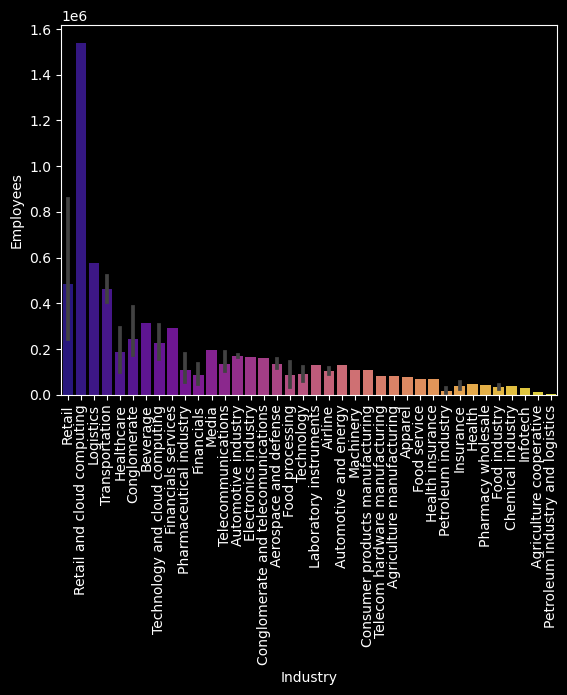

In [43]:
plt.style.use('dark_background');
sns.barplot(data=df.sort_values('Employees', ascending=False), x='Industry', y='Employees', palette='plasma')
plt.xticks(rotation=90)
plt.show()

In [44]:
import chart_studio.plotly as py

In [45]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [46]:
init_notebook_mode(connected=True)

In [47]:
df['State_Headquarters'] = df['State_Headquarters'].str.strip()

In [48]:
state_name_to_abbreviation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [49]:
def convert_state_name_to_abbreviation(state_name):
    return state_name_to_abbreviation.get(state_name)

In [50]:
df['State_Abv'] = df['State_Headquarters'].apply(convert_state_name_to_abbreviation)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    object 
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int32  
 4   Revenue Growth in %     100 non-null    float64
 5   Employees               100 non-null    int32  
 6   City_Headquarters       100 non-null    object 
 7   State_Headquarters      100 non-null    object 
 8   State_Abv               97 non-null     object 
dtypes: float64(1), int32(2), object(6)
memory usage: 7.0+ KB


In [52]:
df.head(5)

,Rank,Name,Industry,Revenue (USD millions),Revenue Growth in %,Employees,City_Headquarters,State_Headquarters,State_Abv
0,1,Walmart,Retail,611289,6.7,2100000,Bentonville,Arkansas,AR
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,Seattle,Washington,WA
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,Spring,Texas,TX
3,4,Apple,Electronics industry,394328,7.8,164000,Cupertino,California,CA
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,Minnetonka,Minnesota,MN


## GEOGRAPHICAL PLOT OF COMPANIES BASED ON THE REVENUE ACROSS THE USA

In [53]:
gdata = dict(
    type='choropleth',
    locationmode='USA-states',
    locations=df['State_Abv'],
    colorscale='ylorrd',
    colorbar={'title':'Revenue(USD millions)'},
    z=df['Revenue (USD millions)'],
    text=df['State_Headquarters']
)

In [54]:
layout = dict(
    title = 'Revenue(USD millions) across USA Top 100 Companies', 
    geo = dict(scope='usa', showlakes=True, bgcolor='grey')
)

In [55]:
import plotly.graph_objects as go

In [56]:
choromap = go.Figure(gdata, layout)

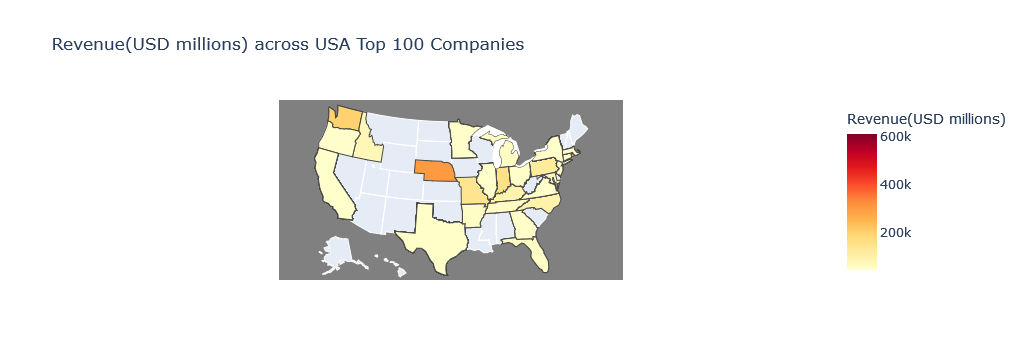

In [57]:
iplot(choromap)

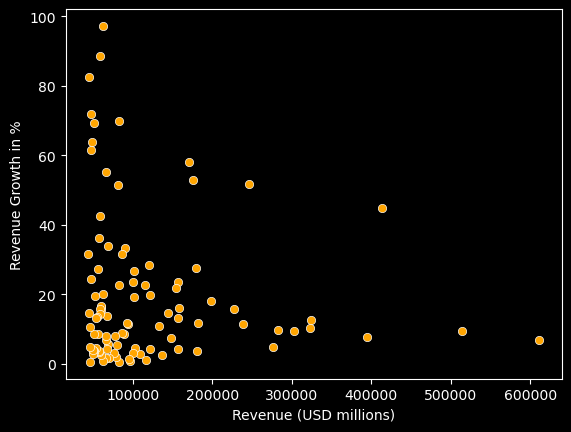

In [58]:
sns.scatterplot(data=df, x='Revenue (USD millions)', y='Revenue Growth in %', color='orange')
plt.style.use('dark_background');

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



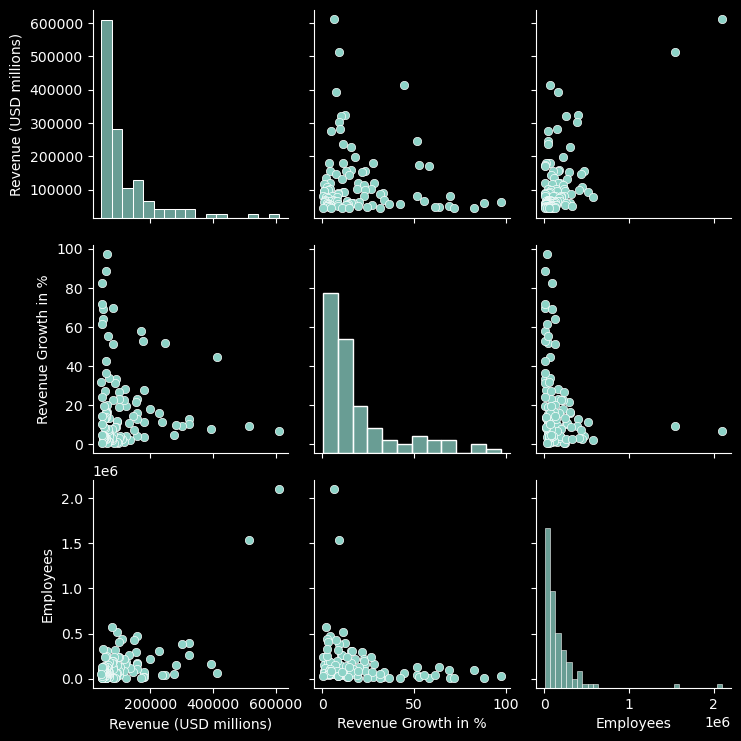

In [59]:
plt.style.use('dark_background');
sns.pairplot(df)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



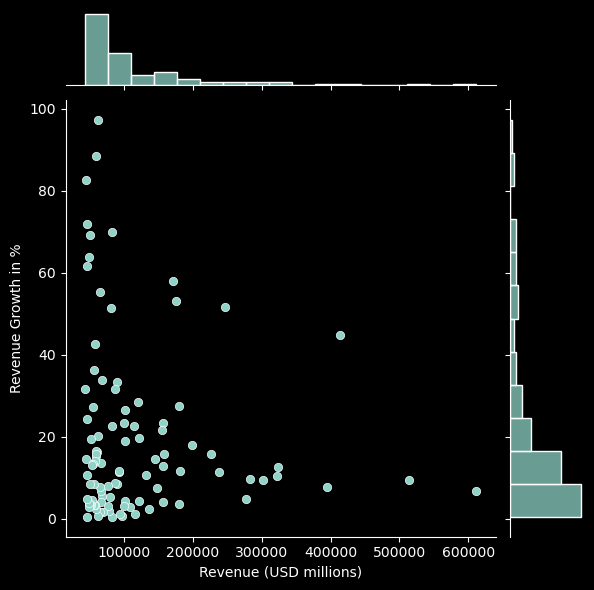

In [60]:
plt.style.use('dark_background');
sns.jointplot(data=df, x='Revenue (USD millions)', y='Revenue Growth in %')
plt.show()

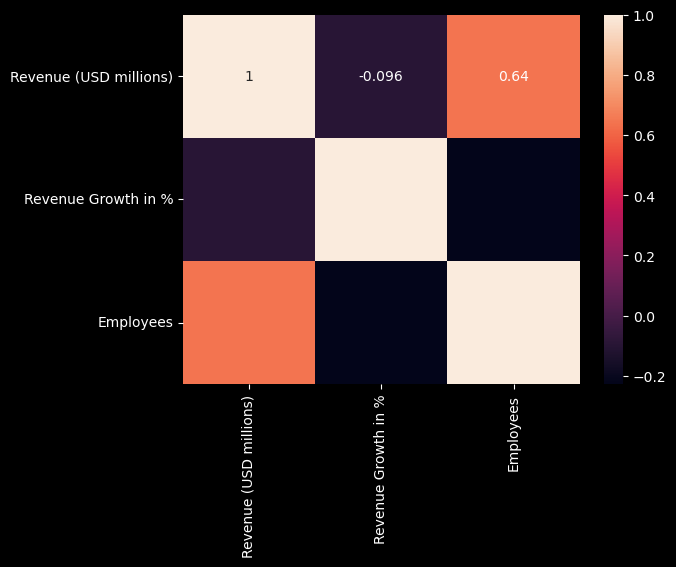

In [61]:
plt.style.use('dark_background');
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [62]:
import sklearn
from sklearn.model_selection import train_test_split

In [63]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)',
       'Revenue Growth in %', 'Employees', 'City_Headquarters',
       'State_Headquarters', 'State_Abv'],
      dtype='object')

In [64]:
x = df[['Industry',  'Employees','City_Headquarters']]
y = df[ 'Revenue (USD millions)']

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
industry_encoder = LabelEncoder()
city_encoder = LabelEncoder()

In [66]:
x['Industry'] = industry_encoder.fit_transform(x['Industry'])
x['City_Headquarters'] = city_encoder.fit_transform(x['City_Headquarters'])

C:\Users\HP\AppData\Local\Temp\ipykernel_11584\1589264328.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_11584\1589264328.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.01, random_state=42)

## LINEAR REGRESSION

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train, y_train)

LinearRegression()

In [71]:
coeff_table = pd.DataFrame(model.coef_, x.columns, columns=['Coefficients'])
coeff_table

,Coefficients
Industry,232.772281
Employees,0.237850
City_Headquarters,381.455793


In [72]:
prediction = model.predict(x_test)

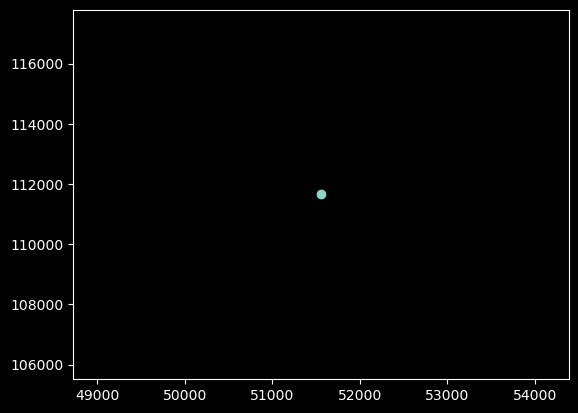

In [73]:
plt.style.use('dark_background');
plt.scatter(y_test, prediction)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11584\4145059519.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'Predicted Revenue')

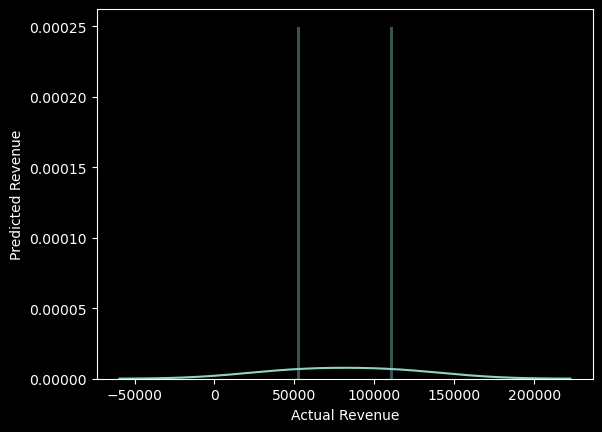

In [74]:
sns.distplot((y_test, prediction), bins=30)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

In [75]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [76]:
print(mae(y_test, prediction))

60093.34707111701


In [77]:
print(mse(y_test, prediction))

3611210362.2097273


In [78]:
print(np.sqrt(mse(y_test, prediction)))

60093.34707111701


In [79]:
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)',
       'Revenue Growth in %', 'Employees', 'City_Headquarters',
       'State_Headquarters', 'State_Abv'],
      dtype='object')

**INDUSRTIES TO WHICH TOP 10 COMPANIES BELONG TO**

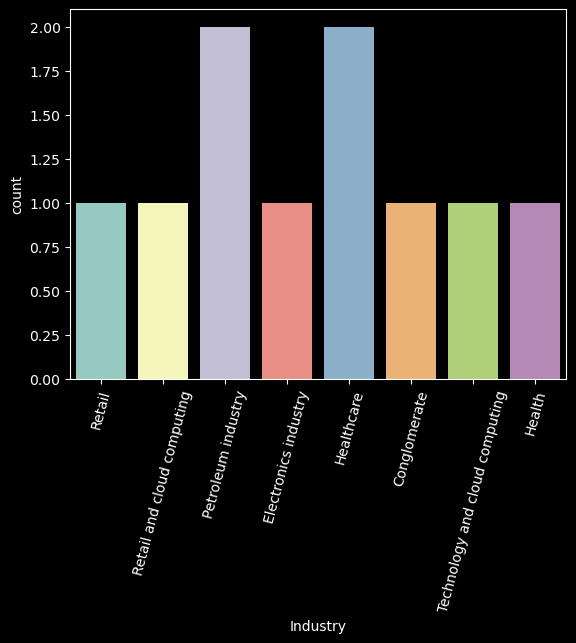

In [80]:
plt.style.use('dark_background');
sns.countplot(data=df.head(10), x='Industry')
plt.xticks(rotation=75)
plt.show()

**CORRELATION AMONG ALL FEATURES OF DATASET**

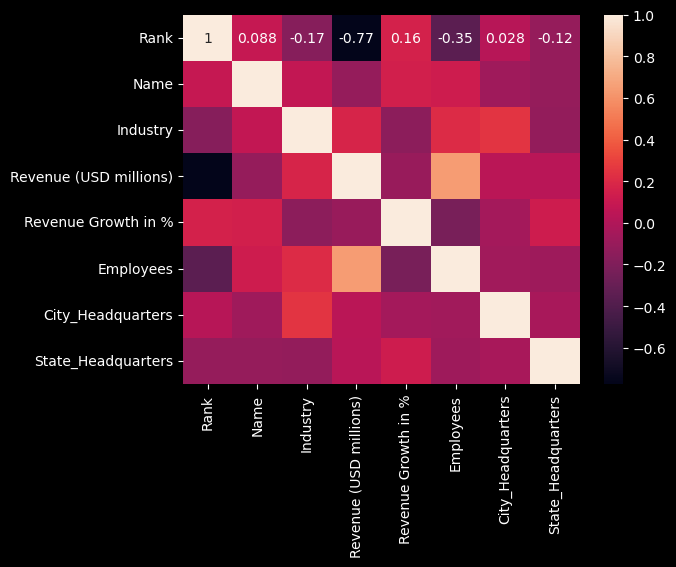

<Figure size 1200x300 with 0 Axes>

In [81]:
plt.style.use('dark_background');
df['Name'] = le.fit_transform(df['Name'])
df['Industry'] = le.fit_transform(df['Industry'])
df['City_Headquarters'] = le.fit_transform(df['City_Headquarters'])
df['State_Headquarters'] = le.fit_transform(df['State_Headquarters'])
df.drop('State_Abv', axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(12,3))
plt.show()

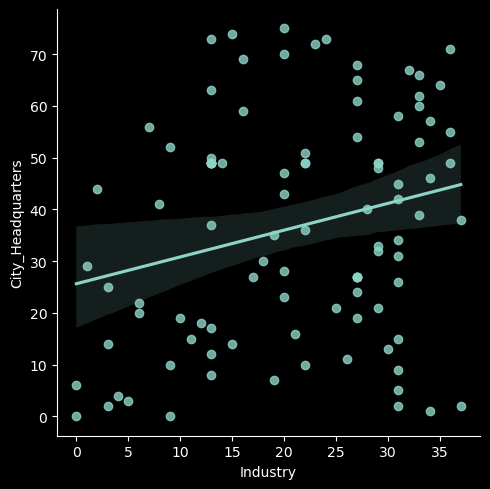

In [82]:
plt.style.use('dark_background');
sns.lmplot(data=df, x='Industry', y='City_Headquarters')
plt.show()

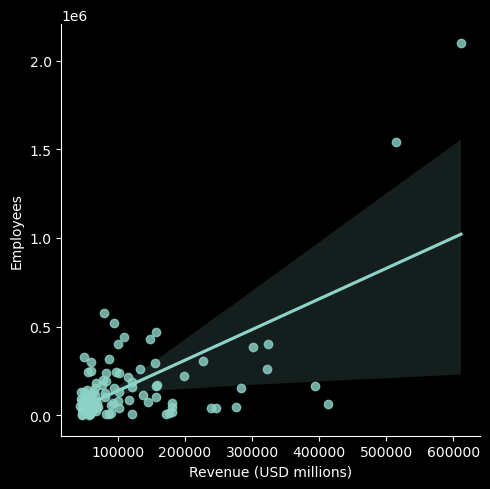

In [83]:
plt.style.use('dark_background');
sns.lmplot(data=df, x='Revenue (USD millions)', y='Employees')
plt.show()

## DECISION TREE REGRESSOR

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)

In [85]:
dtree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [86]:
predict_tree = dtree.predict(x_test)

In [87]:
print(mae(y_test,predict_tree))

92990.0


In [88]:
print(mse(y_test,predict_tree))

8647140100.0


In [89]:
print(np.sqrt(mse(y_test,predict_tree)))

92990.0


## RANDOM FOREST REGRESSOR

In [90]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=62, random_state=42)

In [91]:
rfc.fit(x_train, y_train)

RandomForestRegressor(n_estimators=62, random_state=42)

In [92]:
predict_forest = rfc.predict(x_test)

In [93]:
print(mae(y_test, predict_forest))

96256.30645161291


In [94]:
print(mse(y_test, predict_forest))

9265276531.706818


In [95]:
print(np.sqrt(mse(y_test, predict_forest)))

96256.30645161291


**AS EXPECTED RANDOM FOREST REGRESSOR IS BETTER THAN DECISION TREE REGRESSOR**

## APPLYING HYPERPARAMETER TUNING BY GRID SEARCH CV

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = {
    'n_estimators' : [62, 86, 100],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [98]:
grid_search = GridSearchCV(estimator = rfc, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [99]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=62, random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [62, 86, 100]},
             scoring='neg_mean_squared_error')

In [100]:
print('Best hyperparameters are : ', grid_search.best_params_)

Best hyperparameters are :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 62}


In [101]:
best_model_grid = grid_search.best_estimator_

In [102]:
test_mse_grid = best_model_grid.score(x_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [103]:
print('Test mean squared error is : ', test_mse_grid)

Test mean squared error is :  nan


In [104]:
rfr_grid_tuned = RandomForestRegressor(
    max_depth = None,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100
)

In [105]:
rfr_grid_tuned.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10)

In [106]:
rfr_grid_predict = rfr_grid_tuned.predict(x_test)

In [107]:
print('MAE :',mae(y_test, rfr_grid_predict))

MAE : 73178.12557316918


In [108]:
print('RMSE :',np.sqrt(mse(y_test, rfr_grid_predict)))

RMSE : 73178.12557316918


## HYPER PARAMETER TUNING WITH RANDOMIZED SEARCH

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
from scipy.stats import randint

In [111]:
param_dist = {
    'n_estimators' : randint(10, 100),
    'max_depth' : randint(1, 10),
    'min_samples_split' : randint(2,10),
    'min_samples_leaf' : randint(1,10),
    'bootstrap' : [True, False],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
}

In [112]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=5, scoring= 'neg_mean_squared_error', n_iter=100, random_state=42)

In [113]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=62,
                                                   random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022CE8C14410>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022CE879DED0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022CE8BD0090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022CE8BFBC50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [114]:
print('Best hyperparameters are : ', random_search.best_params_)

Best hyperparameters are :  {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 11}


In [115]:
best_model_random = random_search.best_estimator_

In [116]:
best_model_random

RandomForestRegressor(max_depth=1, min_samples_split=4, n_estimators=11,
                      random_state=42)

In [117]:
test_mse_random = best_model_random.score(x_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [118]:
print('Test mean squared error : ', test_mse_random)

Test mean squared error :  nan


In [119]:
rfr_rand_tuned=RandomForestRegressor(
    bootstrap = True,
    criterion = 'poisson',
    max_depth = 1,
    min_samples_split = 9,
    min_samples_leaf = 6,
    n_estimators = 78
)

In [120]:
rfr_rand_tuned.fit(x_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=1, min_samples_leaf=6,
                      min_samples_split=9, n_estimators=78)

In [121]:
rfr_rand_pred = rfr_rand_tuned.predict(x_test)

In [122]:
print('MAE :',mae(y_test, rfr_rand_pred))

MAE : 53585.588659141315


In [123]:
print('RMSE :',np.sqrt(mse(y_test, rfr_rand_pred)))

RMSE : 53585.588659141315


## HYPER PARAMETER TUNING WITH BAYES SEARCH CV

In [124]:
from skopt import BayesSearchCV

In [125]:
param_space ={
    'n_estimators' : (10,100),
    'max_depth' : (1,50),
    'min_samples_split' : (2,50),
    'min_samples_leaf' : (1,50)
}

In [126]:
bayes_search = BayesSearchCV(estimator=rfc, search_spaces=param_space, scoring='neg_mean_squared_error', cv=5, n_iter=50, random_state=42)

In [127]:
bayes_search.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [1, 1, 2, 10] before, using random point [37, 3, 31, 53]

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [1, 1, 2, 10] before, using random point [32, 40, 14, 14]

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [1, 1, 2, 10] before, using random point [20, 35, 41, 41]

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [1, 1, 2, 10] before, using random point [2, 45, 42, 92]

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [1, 1, 2, 10] before, using random point [40, 12, 45, 34]

C:\Users\HP\anaconda3\Lib\site-packages\skopt\optimizer\o

BayesSearchCV(cv=5,
              estimator=RandomForestRegressor(n_estimators=62, random_state=42),
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'max_depth': (1, 50), 'min_samples_leaf': (1, 50),
                             'min_samples_split': (2, 50),
                             'n_estimators': (10, 100)})

In [128]:
print('The best hyperparameters are : ', bayes_search.best_params_)

The best hyperparameters are :  OrderedDict([('max_depth', 1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 10)])


In [129]:
best_model_bayesian = bayes_search.best_estimator_

In [130]:
test_mse_bayesian = best_model_bayesian.score(x_test, y_test) 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [131]:
print('Test mean squared error is : ', test_mse_bayesian)

Test mean squared error is :  nan


**Bayesian Optimizer by the BayesSearchCV is giving the least test mean squared error**

In [132]:
rfr = RandomForestRegressor(
    max_depth= 35,
    min_samples_split=34,
    min_samples_leaf=7,
    n_estimators=87,
)

In [133]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=35, min_samples_leaf=7, min_samples_split=34,
                      n_estimators=87)

In [134]:
test_mse_final = rfr.score(x_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [135]:
print('Test Mean Squared Error is : ', test_mse_final)

Test Mean Squared Error is :  nan


In [136]:
rfr_predict = rfr.predict(x_test)

In [137]:
print('MAE : ',mae(y_test, rfr_predict))

MAE :  66757.87090409665


In [138]:
print('MSE : ', mse(y_test, rfr_predict))

MSE :  4456613327.648034


In [139]:
print('RMSE : ', np.sqrt(mse(y_test, rfr_predict)))

RMSE :  66757.87090409665


**RANDOMIZED SEARCH CV HAS DONE THE BEST HYPERPARAMETER TUNING IN RANDOMFOREST REGRESSOR**

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [142]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [143]:
gbr_pred = gbr.predict(x_test)

In [144]:
print('MAE :', mae(y_test, gbr_pred))

MAE : 75847.96890690146


In [145]:
print('RMSE :', np.sqrt(mse(y_test, gbr_pred)))

RMSE : 75847.96890690146


## HYPER PARAMETER TUNING VIA BAYES SEARCH CV TECHNIQUE

In [146]:
from skopt import BayesSearchCV

In [147]:
from skopt.space import Real, Integer

In [148]:
search_space = {
    'n_estimators': Integer(10,100),
    'max_depth': Integer(3,10),
    'min_samples_split': Integer(2,30),
    'min_samples_leaf': Integer(1,10),
    'learning_rate':Real(0.01,0.3, prior='log-uniform')
} 

In [149]:
bayes_search_gbr = BayesSearchCV(search_spaces=search_space, estimator=gbr, scoring='neg_mean_squared_error', cv=5, n_iter=50, random_state=42)

In [150]:
bayes_search_gbr.fit(x_train, y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=30, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')})

In [151]:
print('The best hyperparameters for gradient boosting regressor using bayessearchcv method are :', bayes_search_gbr.best_params_)

The best hyperparameters for gradient boosting regressor using bayessearchcv method are : OrderedDict([('learning_rate', 0.092134607543655), ('max_depth', 3), ('min_samples_leaf', 1), ('min_samples_split', 18), ('n_estimators', 17)])


In [152]:
best_model_gbr = bayes_search_gbr.best_estimator_

In [153]:
test_mse_gbr = best_model_gbr.score(x_test, y_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [154]:
print('Test Mean Square Error via Bayes Search CV method is :', test_mse_gbr)

Test Mean Square Error via Bayes Search CV method is : nan


In [155]:
gbr_tuned = GradientBoostingRegressor(
learning_rate= 0.023848662408449097, 
max_depth =5, 
min_samples_leaf= 8, 
min_samples_split =30, 
n_estimators =67
)

In [156]:
gbr_tuned.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.023848662408449097, max_depth=5,
                          min_samples_leaf=8, min_samples_split=30,
                          n_estimators=67)

In [157]:
gbr_tuned_pred = gbr_tuned.predict(x_test)

In [158]:
print('MAE :',mae(y_test, gbr_tuned_pred))

MAE : 49065.07727493592


In [159]:
print('RMSE :',np.sqrt(mse(y_test, gbr_tuned_pred)))

RMSE : 49065.07727493592


## SUPPORT VECTOR REGRESSOR

In [160]:
from sklearn.svm import SVR

In [161]:
svr = SVR(kernel='linear')

In [162]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [163]:
svr_pred = svr.predict(x_test)

In [164]:
print('MAE :', mae(y_test, svr_pred))

MAE : 26036.312242547574


In [165]:
print('RMSE :', np.sqrt(mse(y_test, svr_pred)))

RMSE : 26036.312242547574


## K NEAREST NEIGHBOR REGRESSOR

In [166]:
from sklearn.neighbors import KNeighborsRegressor

In [167]:
knnr = KNeighborsRegressor(n_neighbors=30)

In [168]:
knnr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [169]:
knnr_predict = knnr.predict(x_test)

In [170]:
print('MAE :', mae(y_test, knnr_predict))

MAE : 43215.33333333333


In [171]:
print('RMSE :', np.sqrt(mse(y_test, knnr_predict)))

RMSE : 43215.33333333333


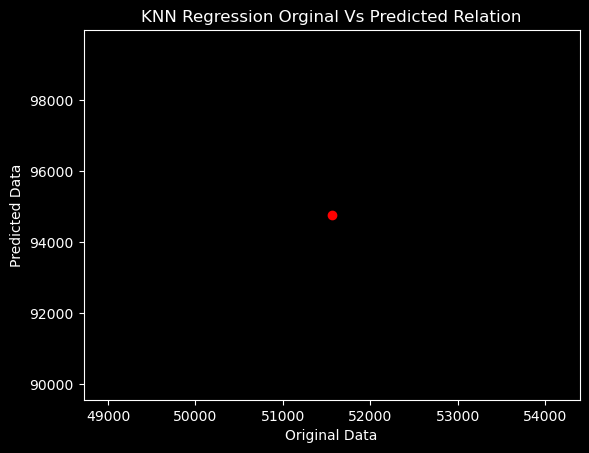

In [172]:
plt.scatter(y_test, knnr_predict, color='r')
plt.xlabel('Original Data')
plt.ylabel('Predicted Data')
plt.title('KNN Regression Orginal Vs Predicted Relation')
plt.show()

## XGBOOST ALGORITHM

In [173]:
import xgboost as xgb

In [174]:
xgbr = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=50)

In [175]:
xgbr.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[11:22:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, ...)

In [176]:
xgbr_pred = xgbr.predict(x_test)

In [177]:
print('MAE :', mae(y_test, xgbr_pred))

MAE : 67579.359375


In [178]:
print('RMSE :', np.sqrt(mse(y_test, xgbr_pred)))

RMSE : 67579.359375


## The best fit to the training data is SUPPORT VECTOR REGRESSOR with a LINEAR KERNEL

## Hence, I will deploy the Support Vector Regressor model with a linear Kernel 

In [179]:
import joblib

In [180]:
joblib.dump(svr, 'svr_model.pk1')

['svr_model.pk1']

In [181]:
joblib.dump(industry_encoder, 'industry_encoder.pk1')

['industry_encoder.pk1']

In [182]:
joblib.dump(city_encoder, 'city_encoder.pk1')

['city_encoder.pk1']

In [183]:
print("Unique values after encoding - Industry:", x['Industry'].unique())

Unique values after encoding - Industry: [31 32 27 12 20  9 34 18 30 19  6 14 36 29 13 10 33 15 37  7 26  5 11 24
 17  0 21 25 28 22  8 16  2 35  3  1  4 23]


In [184]:
print("Unique values after encoding - city:", x['City_Headquarters'].unique())

Unique values after encoding - city: [ 5 67 68 18 43 75 52 46 30 65 13 31 57 23  7 24 27 61 20  2 22 28 49 15
 70 21 73 55 19 39 12 42 60 14 45 48 38 35  8 37 56 63 11  3  9 10 74  0
  6 66 53 16  1 47 50 32 40 33 41 34 71 69 44 64 17 51 26 36 25 29 59 54
  4 58 72 62]
